# Homework

[//]: # "##### Write a Julia function of the bisection method that has the following specifications.

- The function name has to be `bisection_a`. (So that TA can test your code by simply pasting a test code to your homework.)

- An example of its usage is: `bisection_a(f, -1, 2, 1e-6, 10)`
   - `f` is the name of a function to be subjected for root-finding,   
   - `-1` is the lower bound of the initial bracket,
   - `2` is the upper bound of the initial bracket,
   - `1e-6` is the convergence criterion,
   - `10` is the maximum number of iterations.
   
- It should check whether the initial bracket contains the root.   
   
- If it hits the maximum number of iterations before convergence, it should print the result from the last iteration with an informative error message.

-  Consider the function $f(x) = x^3 + 4x^2 - 10$. 
  - Plot the function using `Plots`.
  - Use `bisection_a` to find the root of $f(x)$."






## The following `bisection` is a Julia program for root finding using the bisection method.
- Add comments to places marked by `##` to explain the lines.
  - For instance (a silly example): `iter=1   ## starts the iteration count`.
  - Your comments should be more extensive than what you normally do for your own code, because the purpose is to see if you understand the purpose of the code.
-  Consider the function $f(x) = x^3 + 4x^2 - 10$. 
  - Plot the function using the `Plots` package.
  - Use `bisection` to find the root of $f(x)$.  

In [2]:
using Interact, WebIO, Plots
using Symbolics, SymPy
using FiniteDifferences, ForwardDiff

WebIO._IJuliaInit()

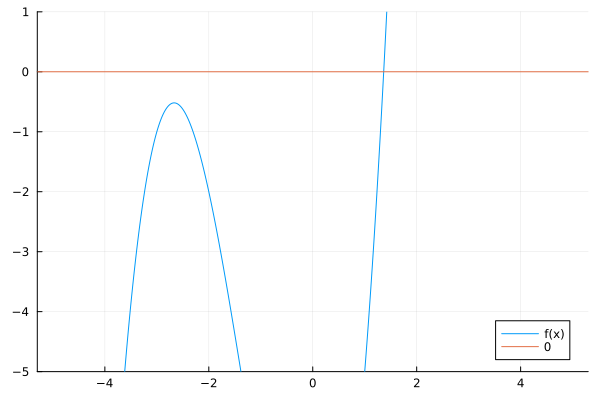

In [59]:
f(x) = x^3 + 4*(x ^ 2)-10
x = range(-5,5,length=1000)
plot(x,f.(x),label="f(x)",ylim=[-5,1])
hline!([0],label="0")

In [60]:
function bisection(f::Function,a,b,eps,imax)
    
    f(a)f(b)<0 || throw("The ($a, $b) does not contain the solution.")  #f(a)和f(b)異號根據中值定理才能夠保證至少f(x)有一點穿越x軸，即有root#
    
    iter=1                           
    p=0.0      
    while iter<=imax                  #要求執行迴圈要小於自己設定的 imax 值，否則離開迴圈#
        p = a+(b-a)/2                 #從[a ,b]的中央尋根，並且每次迭代將所搜尋的範圍設為上次的一半#   
        if f(p)==0 || abs(a-b)<eps    #若發生f(p)=0(找到根)或下次估計進步的幅度小於自己設定的eps(離根很近)，就當作找到答案#
            return println("p is $p and the iteration number is $iter")
        end      
    
        f(a)f(p)<0 ? b=p : a=p        #if f(a)和f(p)異號 then 將b 設為p，否則將a設為p。意圖是在依靠中值定理是正式縮小p的範圍#
        
        iter += 1
    end
    y=f(p)                            #f(a)和f(b)異號但找不到根，回傳f(p)值#   
    println("Maximum number of iterations is researched and the method did not converge. The last iteration gives $p with function value $y")   ##
end


bisection (generic function with 1 method)

In [61]:
bisection(f,0,2,1e-7,1e5)

p is 1.365229994058609 and the iteration number is 26


In [62]:
bisection(f,-4,-2,1e-7,1e5)

LoadError: "The (-4, -2) does not contain the solution."

In [63]:
bisection(f,0,2,1e-7,0)

Maximum number of iterations is researched and the method did not converge. The last iteration gives 0.0 with function value -10.0


## Suppose you are dealing with functions that have multiple roots such as the `h(x)` given below.  In general, it is not possible to find all the roots for such functions without further information. Nevertheless, if the roots are reasonably spaced apart (e.g., the distance between them is much larger than the error tolerance used in checking convergence), we could find the roots that fall in a given interval $[a, b]$.

- Use the package `Plots` to plot the function $h(x) = 0.1 + \sin(x) + \cos(x) - 0.01x^3$ for $x$ in the range of $[-10, 10]$. 
  - The graph is to give you an idea of what multiple roots mean.

- Modify `bisection` so that it can deal with functions that have multiple roots in the range of $[a,b]$.  Name the function `bisection_b`.
  - Hint: You may start from one end of the bracket, find the first root, use it to find the next one.
  - The function should not be tailored to $h(x)$ given above. It should be general enough for other multiple-roots functions.

- Suppose you are given the function $h(x) = 0.1 + \sin(x) + \cos(x) - 0.01x^3$ and you are NOT allowed to plot the function for inspection. The only information you have is that it has multiple roots in $[-7,7]$. Use `bisection_b` to find the roots of $h(x)$.

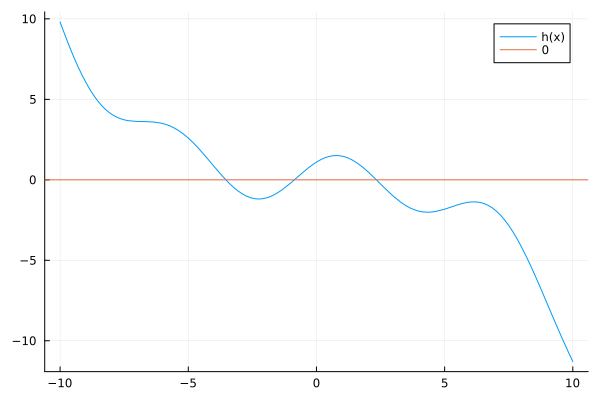

In [64]:
h(x) = 0.1+ sin(x) + cos(x) -0.01*x^3
plot(h,-10,10,label="h(x)")
hline!([0],label="0")

In [65]:
function bisection_b(f::Function,ans=[],a=-7,b=7,eps=1e-7,imax=50) 
   
    
    iter=1                           
    p=0.0      
    while iter<=imax                  #要求執行迴圈要小於自己設定的 imax 值，否則離開迴圈#
        p = a+(b-a)/2                 #從[a ,b]的中央尋根，並且每次迭代將所搜尋的範圍設為上次的一半#   
     
        if abs(f(p)) < eps   && (abs.(ans.-p) .> 0.001 ) == ones(length(ans)) #two condition:　1.f(p)~0； 2.解之間不要離太近
            
            push!(ans,p)
            bisection_b(f, ans,-7, p) #recursive solve problem divide problem by [-7,p] and [p,7]
            bisection_b(f, ans, p, 7) 
        end      
    
        f(a)f(p)<0 ? b=p : a=p       
        
        iter += 1
    end
    return ans
    
end
bisection_b(h)

3-element Vector{Any}:
  2.3366873264312744
 -3.5341251540311873
 -0.8606883040310476

In [66]:
h.(bisection_b(h))

3-element Vector{Float64}:
 -9.77779306410298e-8
 -7.479049674019578e-8
  7.319979685588285e-8